In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

sns.set_style('whitegrid')
#sns.set(font='Meiryo')

In [23]:
df_seiseki = pd.read_csv('SEISEKI2009-2020.csv')
df_seiseki.info()

/Users/toshi/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581823 entries, 0 to 581822
Data columns (total 54 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   年         581823 non-null  int64  
 1   月         581823 non-null  int64  
 2   日         581823 non-null  int64  
 3   日付S       581823 non-null  object 
 4   回次        581823 non-null  int64  
 5   場所        581823 non-null  object 
 6   日次        581823 non-null  object 
 7   レース番号     581823 non-null  int64  
 8   レースID(新)  581823 non-null  int64  
 9   略レース名     581823 non-null  object 
 10  クラスコード    581823 non-null  int64  
 11  芝・ダ       581823 non-null  object 
 12  トラックコード   581823 non-null  int64  
 13  距離        581823 non-null  int64  
 14  馬場状態      581823 non-null  object 
 15  天候        581823 non-null  object 
 16  馬名        581823 non-null  object 
 17  性別        581823 non-null  object 
 18  年齢        581823 non-null  int64  
 19  騎手        581823 non-null  object 
 20  斤量  

In [24]:
df = df_seiseki[['賞金', '単勝オッズ', '人気', '斤量', '補正タイム', 'PCI', '確定着順']]
df.isnull().sum()
#df.dropna(inplace=True)

賞金           0
単勝オッズ     2074
人気        2074
斤量           0
補正タイム    24261
PCI      22886
確定着順         0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581823 entries, 0 to 581822
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   賞金      581823 non-null  int64  
 1   単勝オッズ   579749 non-null  float64
 2   人気      579749 non-null  float64
 3   斤量      581823 non-null  float64
 4   補正タイム   557562 non-null  float64
 5   PCI     558937 non-null  float64
 6   確定着順    581823 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 31.1 MB


In [26]:
corrmat = df.corr()
corrmat

,賞金,単勝オッズ,人気,斤量,補正タイム,PCI,確定着順
賞金,1.000000,-0.160841,-0.244705,0.082116,0.263429,0.143438,-0.390607
単勝オッズ,-0.160841,1.000000,0.739830,-0.124681,-0.418237,-0.102747,0.462228
人気,-0.244705,0.739830,1.000000,-0.122589,-0.436298,-0.119846,0.582103
斤量,0.082116,-0.124681,-0.122589,1.000000,0.111826,0.069625,-0.107180
補正タイム,0.263429,-0.418237,-0.436298,0.111826,1.000000,0.403876,-0.734253
PCI,0.143438,-0.102747,-0.119846,0.069625,0.403876,1.000000,-0.280367
確定着順,-0.390607,0.462228,0.582103,-0.107180,-0.734253,-0.280367,1.000000


In [35]:
df

,賞金,単勝オッズ,人気,斤量,補正タイム,PCI,確定着順
0,50,8.3,4.0,54.0,94.0,48.0,5
1,0,209.7,12.0,54.0,94.0,48.8,6
2,130,6.5,2.0,54.0,100.0,49.2,3
3,500,7.1,3.0,54.0,101.0,48.6,1
4,0,26.2,7.0,52.0,72.0,43.1,12
...,...,...,...,...,...,...,...
581818,300,98.5,15.0,54.0,102.0,52.4,2
581819,0,62.2,12.0,51.0,85.0,50.3,9
581820,0,24.7,9.0,52.0,63.0,46.6,15
581821,0,19.8,8.0,57.0,82.0,47.0,12


In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
vec = KMeans(n_clusters=4, max_iter=1000)
group_num = vec.fit_predict(df.head(160)) # クラスタリング結果は都度変化する(K-Mewansのアルゴリズム)
group_num

array([3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 2,
       3, 0, 3, 0, 3, 3, 3, 2, 3, 3, 0, 3, 3, 3, 3, 0, 3, 2, 3, 0, 3, 0,
       3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 2, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 2, 3, 3, 3,
       3, 3, 0, 1, 3, 0, 3, 0, 3, 3, 3, 3, 2, 3, 3, 0, 2, 3, 1, 3, 3, 3,
       3, 2, 0, 3, 3, 0, 3, 2, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3,
       0, 1, 0, 3, 3, 2, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 2, 3, 3, 3, 3, 3,
       0, 3, 0, 3, 0, 2], dtype=int32)

In [57]:
df_calc = df.head(150).copy()
df_calc['グループ'] = group_num
df_calc.groupby('グループ').mean()

,賞金,単勝オッズ,人気,斤量,補正タイム,PCI,確定着順
グループ,,,,,,,
0,187.354839,19.670968,4.774194,55.064516,98.451613,53.348387,3.096774
1,570.833333,13.258333,4.083333,55.250000,101.416667,53.025000,1.250000
2,8.817308,72.001923,8.067308,54.865385,85.682692,51.250000,8.855769
3,1193.333333,4.866667,1.666667,55.000000,104.333333,55.866667,1.000000


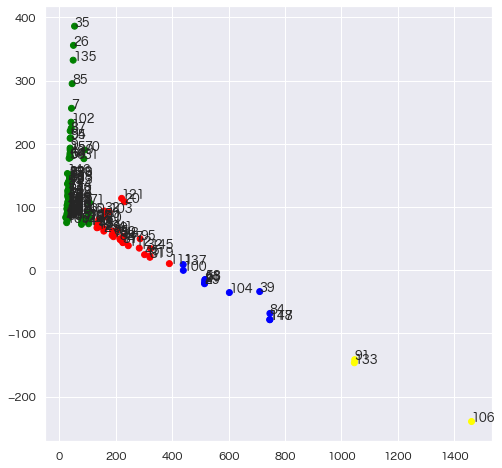

In [60]:
from sklearn.decomposition import TruncatedSVD

model_svd = TruncatedSVD(n_components=2)
vecs_list = model_svd.fit_transform(df_calc)

X = vecs_list[:, 0]
Y = vecs_list[:, 1]

sns.set(font='Hiragino Maru Gothic Pro')
plt.figure(figsize=(8, 8))

color_codes = {0:'red', 1:'blue', 2:'green', 3:'yellow'}
colors = [color_codes[x] for x in group_num]
plt.scatter(X, Y, color=colors)

for i, (x_name, y_name) in enumerate(zip(X, Y)):
    plt.annotate(df.index[i], (x_name, y_name))
plt.show()

In [ ]:
mask = np.triu(np.ones_like(corrmat, dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.set(font_scale=1.5)
sns.heatmap(corrmat, cmap=cmap,
                     mask=mask,
                     vmax=3,
                     center=0,
                     annot=True,
                     square=True,
                     linewidths=.5,
                     cbar_kws={'shrink':.5},
                     annot_kws={'size':14}
           )

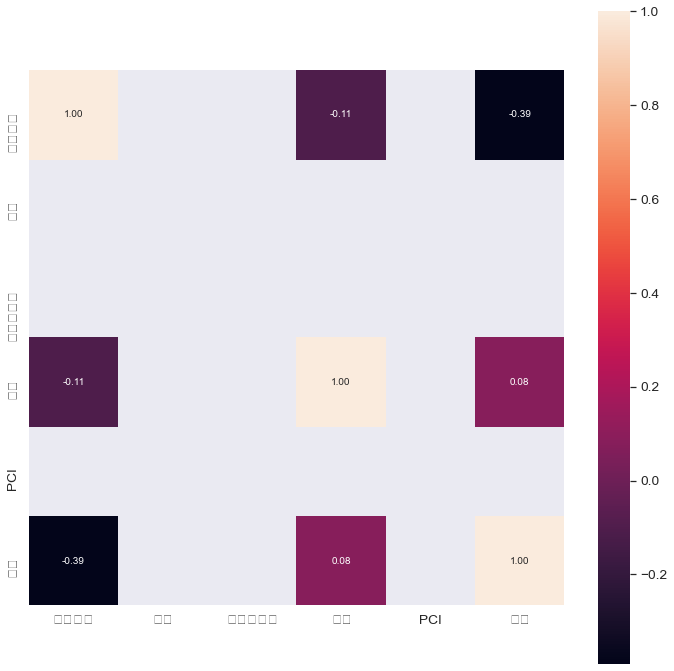

In [28]:
k = 6
cols = corrmat.nlargest(k, '確定着順')['確定着順'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(12, 12))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/Users/toshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/toshi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30906 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/toshi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/toshi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30528 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/toshi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 38918 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/toshi/opt/anaconda3/lib/python3.8/site-pa

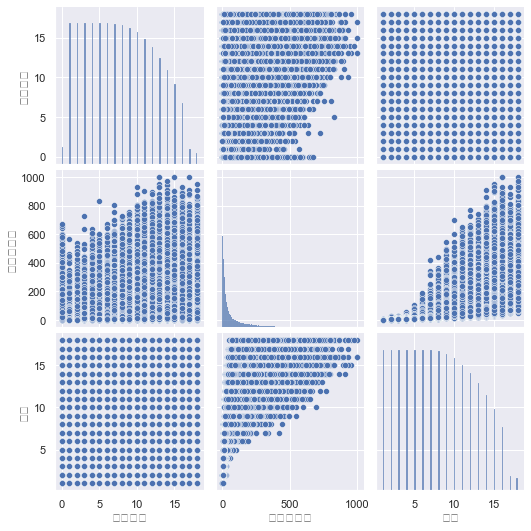

In [29]:
# 相関の強い要素の散布図を表示
sns.set()
cols = ['確定着順', '単勝オッズ', '人気']
sns.pairplot(df[cols], size=2.5)
plt.show()

In [30]:
df['単勝オッズ'] = df['単勝オッズ'].astype(int)
df['人気'] = df['人気'].astype(int)
df['馬体重'] = df['馬体重'].astype(int)
df['増減'] = df['増減'].astype(int)

df.info()

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [11]:
df.dtypes.value_counts()

float64    5
int64      2
dtype: int64

KeyError: '馬体重'

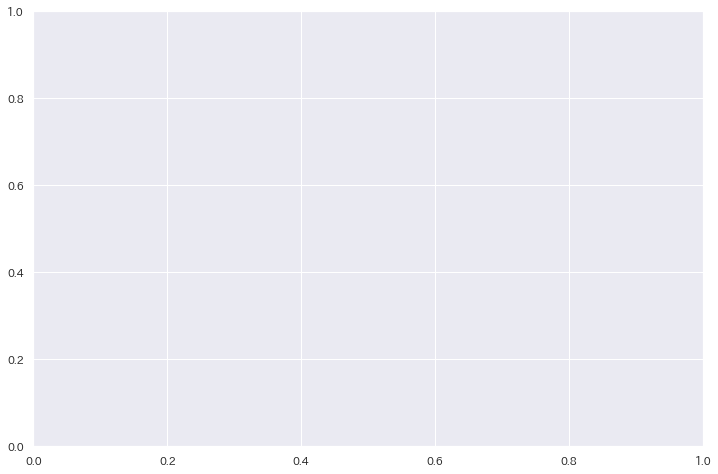

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
df.plot(kind='scatter', x='確定着順', y='馬体重', s=20, cmap='winter', ax=ax)

In [11]:
df.corr()

,賞金,単勝オッズ,人気,馬体重,増減,確定着順
賞金,1.000000,-0.160841,-0.244705,0.081665,0.006107,-0.390607
単勝オッズ,-0.160841,1.000000,0.739830,-0.160750,-0.024538,0.462228
人気,-0.244705,0.739830,1.000000,-0.151025,-0.013485,0.582103
馬体重,0.081665,-0.160750,-0.151025,1.000000,0.124401,-0.088686
増減,0.006107,-0.024538,-0.013485,0.124401,1.000000,-0.005690
確定着順,-0.390607,0.462228,0.582103,-0.088686,-0.005690,1.000000


/Users/toshi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 36062 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/toshi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 37329 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/toshi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/toshi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21213 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/toshi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12458 missing from current font.
  font.set_t

/Users/toshi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 36062 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/toshi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 37329 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/toshi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21336 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/toshi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21213 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/toshi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12458 missing from current font.
  font.set_text(s, 0

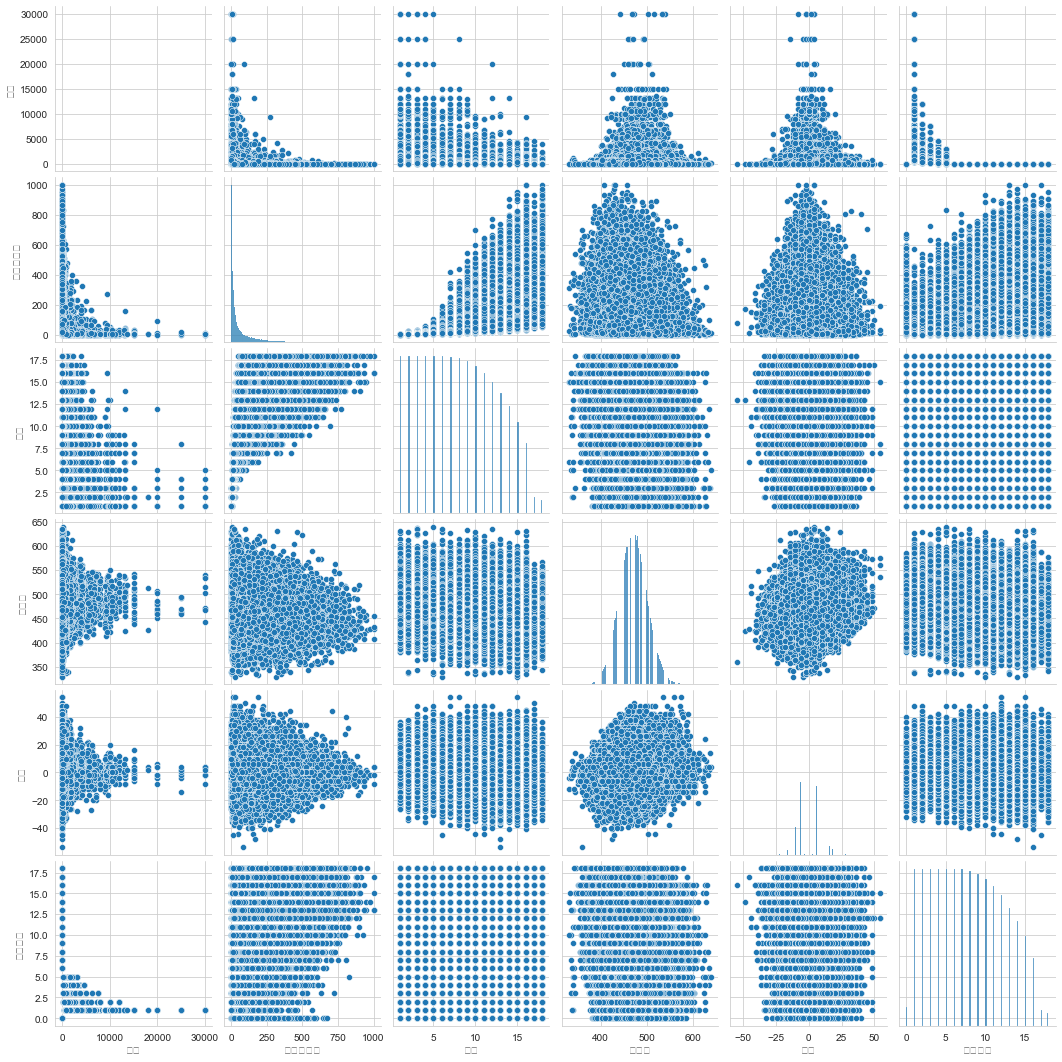

In [20]:
sns.pairplot(df)

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA()
X_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(X_pca, columns=['1st', '2nd', '3rd', '4th', '5th', '6th', '7th'])
df_pca.head()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [66]:
# 寄与率
pca.explained_variance_ratio_

array([9.56745717e-01, 3.93331015e-02, 3.63444474e-03, 1.92388694e-04,
       6.67675525e-05, 2.75802303e-05])

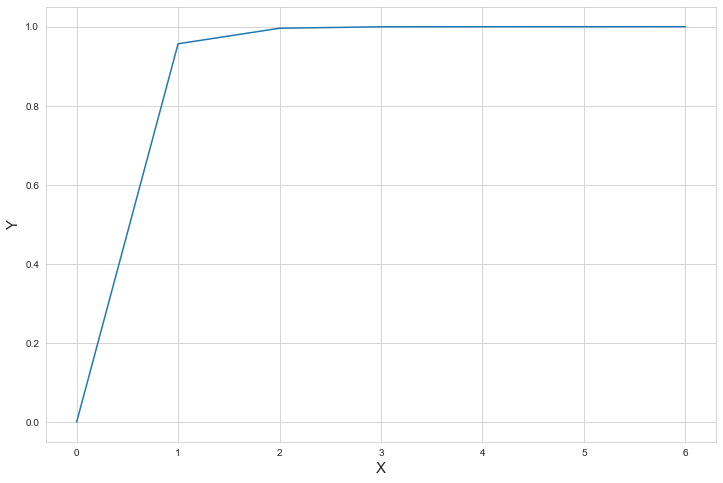

In [73]:
plt.figure(figsize=(12,8))
#plt.plot(pca.explained_variance_ratio_.cumsum())
plt.plot(np.hstack([0, pca.explained_variance_ratio_.cumsum()]))
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.show()

In [74]:
# 付加量
pca.components_

array([[ 9.99392180e-01, -3.41796169e-02, -2.33081013e-03,
         5.25796602e-03,  8.99185291e-05, -3.73324068e-03],
       [ 3.45267635e-02,  9.97368261e-01,  3.26953408e-02,
        -5.14748165e-02, -1.82335568e-03,  1.85064265e-02],
       [-3.48342034e-03,  5.17111554e-02, -1.41839955e-03,
         9.98207689e-01,  2.98469170e-02,  1.54326760e-03],
       [ 1.04545742e-04, -5.97361630e-05,  6.88409573e-03,
        -2.98822470e-02,  9.99510338e-01,  6.22330528e-03],
       [ 3.28543610e-03, -3.23264426e-02,  4.91698578e-01,
         1.30170626e-03, -8.76755410e-03,  8.70113873e-01],
       [ 4.83353750e-04,  1.92161296e-02, -8.70119927e-01,
        -3.07631669e-03,  2.83589793e-03,  4.92447269e-01]])

<AxesSubplot:>

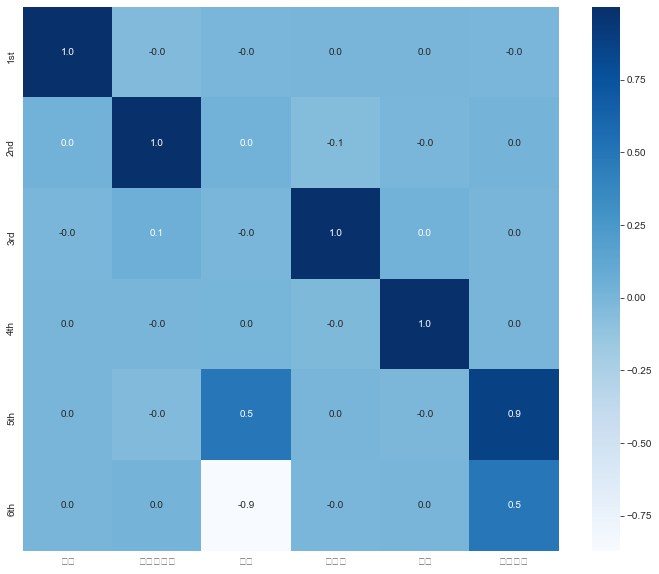

In [78]:
plt.figure(figsize=(12,10))
sns.heatmap(pca.components_,
            cmap='Blues',
            annot=True,
            fmt='1.1f',
            xticklabels=df.columns,
            yticklabels=['1st', '2nd', '3rd', '4th', '5th', '6th'])

<AxesSubplot:xlabel='1st', ylabel='2nd'>

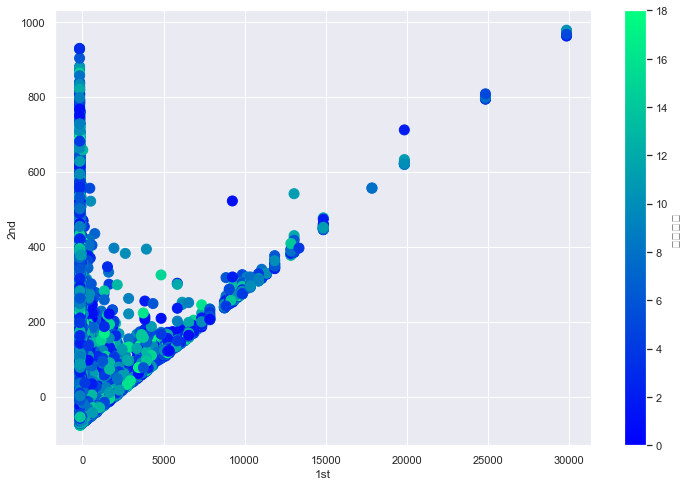

In [95]:
df_pca['確定着順'] = df['確定着順']
fig, ax = plt.subplots(figsize=(12, 8))
df_pca.plot(kind='scatter', x='1st', y='2nd', c='確定着順', s=100, cmap='winter', ax=ax)

In [14]:
import matplotlib.font_manager
print([f.name for f in matplotlib.font_manager.fontManager.ttflist])

['STIXSizeTwoSym', 'STIXSizeThreeSym', 'DejaVu Sans Mono', 'STIXSizeOneSym', 'DejaVu Sans', 'STIXNonUnicode', 'STIXGeneral', 'cmtt10', 'cmss10', 'DejaVu Serif', 'STIXSizeThreeSym', 'DejaVu Sans Display', 'cmmi10', 'DejaVu Sans Mono', 'STIXSizeOneSym', 'DejaVu Serif Display', 'DejaVu Sans', 'STIXGeneral', 'STIXGeneral', 'cmex10', 'DejaVu Serif', 'STIXNonUnicode', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'DejaVu Sans', 'STIXSizeTwoSym', 'STIXSizeFourSym', 'DejaVu Serif', 'STIXNonUnicode', 'DejaVu Sans Mono', 'cmsy10', 'DejaVu Serif', 'STIXNonUnicode', 'cmr10', 'STIXSizeFiveSym', 'STIXGeneral', 'cmb10', 'DejaVu Sans', '.SF Compact Rounded', 'HakusyuKointaiBold', 'Noto Serif Myanmar', 'Lato', 'Lao Sangam MN', 'Arial Narrow', 'Arial Unicode MS', 'AppleMyungjo', 'Silom', 'Gurmukhi Sangam MN', 'Noto Sans Yi', 'Lato', 'Gujarati MT', 'A-OTF ????CBSK1 Pro', 'Apple Braille', 'A-OTF Ryumin Pro', 'STIXNonUnicode', '.SF NS Display Condensed', 'Dosis', 'American Typewriter', 'Diwan Thuluth', '.SF NS Ro

In [24]:
import matplotlib as mpl
print(mpl.matplotlib_fname())

/Users/toshi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc


In [24]:
import string
ALPHABET = string.ascii_uppercase
ALPHABET[1]

'B'

In [18]:
import matplotlib
matplotlib.matplotlib_fname()

'/Users/toshi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'

In [19]:
import matplotlib.font_manager
matplotlib.font_manager._rebuild()

Matplotlib is building the font cache; this may take a moment.


FileNotFoundError: [Errno 2] No such file or directory: '/Users/toshi/.matplotlib/fontlist-v330.json.matplotlib-lock'

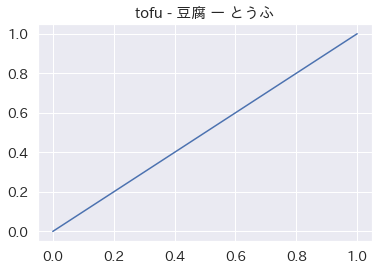

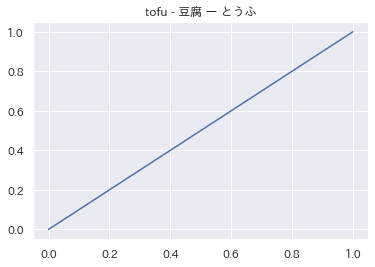

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
font = {'family':'IPAexGothic'}
mpl.rc('font', **font)
plt.plot([0,1], [0,1])
plt.title('tofu - 豆腐 ー とうふ')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='IPAexGothic')
plt.plot([0,1], [0,1])
plt.title('tofu - 豆腐 ー とうふ')
plt.show()